# Gradient Vanishing

# Basics

## Load Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [88]:
# Load and preprocess the abalone dataset
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
           'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# Load data
df = pd.read_csv('abalone.data', names=columns)

print("Dataset Info:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
Shape: (4177, 9)

First 5 rows:
  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [89]:
# One-hot encode Sex column
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)

# Separate features and target
X = df.drop('Rings', axis=1).values
y = df['Rings'].values.reshape(-1, 1)

# Normalize target to [0, 1] range
y_min, y_max = y.min(), y.max()
y_normalized = (y - y_min) / (y_max - y_min)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target range: {y_min} to {y_max}")

Features shape: (4177, 10)
Target shape: (4177, 1)
Target range: 1 to 29


In [90]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_normalized, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 3341
Test samples: 836


## Activation funtion

In [91]:
def Relu(x):
    """Relu activation function"""
    return np.maximum(0, x)
    
def Relu_derivative(x):
    """Derivative of Relu function"""
    return (x > 0).astype(float)

## Hyperparameters

In [92]:
# Hyperparameters
ETA = 0.01
EPOCHS = 1000

# Single Layer Neural Network

In [93]:
class SingleLayerNN:
    def __init__(self, input_size, output_size, learning_rate=ETA, epochs=EPOCHS):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size))
        self.errors = []
        self.gradients = []  # Track gradient magnitudes
        
    
    def forward(self, X):
        """Forward propagation"""
        self.z = np.dot(X, self.weights) + self.bias
        self.activation = Relu(self.z)
        return self.activation
    
    def compute_loss(self, y_true, y_pred):
        """Mean Squared Error loss"""
        m = y_true.shape[0]
        loss = np.sum((y_pred - y_true) ** 2) / (2 * m)
        return loss
    
    def backward(self, X, y_true, y_pred):
        """Backpropagation"""
        m = X.shape[0]
        
        # Gradient computation
        dz = (y_pred - y_true) * Relu_derivative(y_pred)
        dw = np.dot(X.T, dz) / m
        db = np.sum(dz, axis=0, keepdims=True) / m
        
        # Store gradient magnitude (L2 norm)
        gradient_magnitude = np.sqrt(np.sum(dw ** 2) + np.sum(db ** 2))
        
        # Update weights and bias
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
        
        return gradient_magnitude
    
    def train(self, X_train, y_train, X_val=None, y_val=None, verbose=True):
        """Train the neural network"""
        for epoch in range(self.epochs):
            # Forward propagation
            y_pred = self.forward(X_train)
            
            # Backward propagation
            grad_magnitude = self.backward(X_train, y_train, y_pred)
            
            # Compute and store error and gradients
            if epoch % 10 == 0:
                train_loss = self.compute_loss(y_train, y_pred)
                self.errors.append(train_loss)
                self.gradients.append(grad_magnitude)
                
                if verbose and epoch % 100 == 0:
                    if X_val is not None and y_val is not None:
                        val_pred = self.forward(X_val)
                        val_loss = self.compute_loss(y_val, val_pred)
                        print(f"Epoch {epoch}/{self.epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Grad: {grad_magnitude:.6f}")
                    else:
                        print(f"Epoch {epoch}/{self.epochs} - Train Loss: {train_loss:.4f}, Grad: {grad_magnitude:.6f}")
    
    def predict(self, X):
        """Make predictions"""
        return self.forward(X)
    
    def plot_loss(self):
        """Plot training loss"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.errors)
        plt.xlabel('Epochs (x10)')
        plt.ylabel('Mean Squared Error')
        plt.title('Training Loss over Epochs')
        plt.grid(True)
        plt.show()
    
    def plot_gradients(self):
        """Plot gradient magnitude over epochs"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.gradients)
        plt.xlabel('Epochs (x10)')
        plt.ylabel('Gradient Magnitude (L2 Norm)')
        plt.title('Gradient Magnitude over Epochs')
        plt.grid(True)
        plt.show()
    
    def plot_loss_and_gradients(self):
        """Plot both loss and gradient magnitude"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss
        ax1.plot(self.errors)
        ax1.set_xlabel('Epochs (x10)')
        ax1.set_ylabel('Mean Squared Error')
        ax1.set_title('Training Loss over Epochs')
        ax1.grid(True)
        
        # Plot gradients
        ax2.plot(self.gradients, color='orange')
        ax2.set_xlabel('Epochs (x10)')
        ax2.set_ylabel('Gradient Magnitude (L2 Norm)')
        ax2.set_title('Gradient Magnitude over Epochs')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

In [94]:
# Initialize and train model
input_size = X_train.shape[1]
output_size = 1

print(f"Initializing Single-Layer Neural Network...")
print(f"Input size: {input_size}, Output size: {output_size}")
print(f"Learning rate: {ETA}, Epochs: {EPOCHS}")

model = SingleLayerNN(input_size, output_size, learning_rate=ETA, epochs=EPOCHS)

Initializing Single-Layer Neural Network...
Input size: 10, Output size: 1
Learning rate: 0.01, Epochs: 1000


In [95]:
# Train the model
print("Training model...")
model.train(X_train, y_train, X_test, y_test, verbose=True)

Training model...
Epoch 0/1000 - Train Loss: 0.0544, Val Loss: 0.0537, Grad: 0.229739
Epoch 100/1000 - Train Loss: 0.0216, Val Loss: 0.0210, Grad: 0.214103
Epoch 200/1000 - Train Loss: 0.0060, Val Loss: 0.0059, Grad: 0.068324
Epoch 300/1000 - Train Loss: 0.0039, Val Loss: 0.0039, Grad: 0.026674
Epoch 400/1000 - Train Loss: 0.0035, Val Loss: 0.0035, Grad: 0.012838
Epoch 500/1000 - Train Loss: 0.0034, Val Loss: 0.0035, Grad: 0.008794
Epoch 600/1000 - Train Loss: 0.0034, Val Loss: 0.0034, Grad: 0.007371
Epoch 700/1000 - Train Loss: 0.0033, Val Loss: 0.0034, Grad: 0.006506
Epoch 800/1000 - Train Loss: 0.0033, Val Loss: 0.0033, Grad: 0.005803
Epoch 900/1000 - Train Loss: 0.0033, Val Loss: 0.0033, Grad: 0.005190


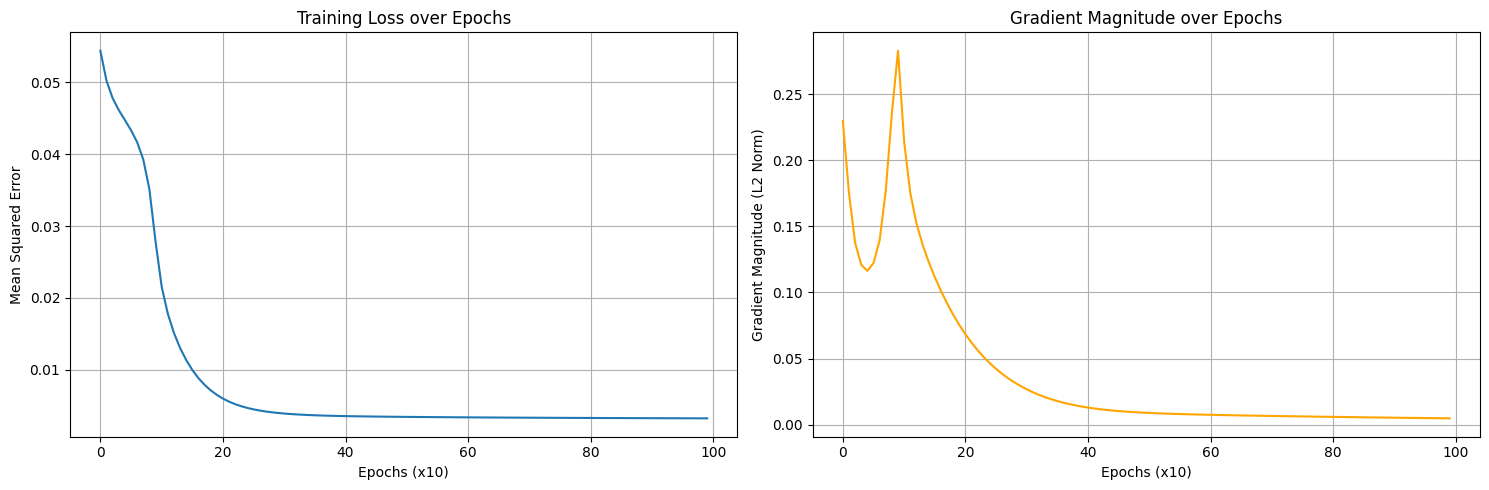

In [96]:
# Plot both loss and gradients side by side
model.plot_loss_and_gradients()

In [97]:
# Evaluate model performance
def evaluate_model(model, X, y_normalized, y_min, y_max):
    """Evaluate model performance"""
    # Make predictions
    y_pred_normalized = model.predict(X)
    
    # Denormalize predictions
    y_pred = y_pred_normalized * (y_max - y_min) + y_min
    y_true = y_normalized * (y_max - y_min) + y_min
    
    # Calculate metrics
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    
    return mse, rmse, mae

# Evaluate on training set
print("=== Training Set Performance ===")
train_mse, train_rmse, train_mae = evaluate_model(model, X_train, y_train, y_min, y_max)
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")

# Evaluate on test set
print("\n=== Test Set Performance ===")
test_mse, test_rmse, test_mae = evaluate_model(model, X_test, y_test, y_min, y_max)
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

=== Training Set Performance ===
MSE: 5.0621
RMSE: 2.2499
MAE: 1.6049

=== Test Set Performance ===
MSE: 5.1739
RMSE: 2.2746
MAE: 1.6275


In [98]:
# Show sample predictions
print("=== Sample Predictions ===")
sample_indices = np.random.choice(X_test.shape[0], 10, replace=False)
for idx in sample_indices:
    pred_normalized = model.predict(X_test[idx:idx+1])
    pred = pred_normalized * (y_max - y_min) + y_min
    true = y_test[idx:idx+1] * (y_max - y_min) + y_min
    print(f"Predicted: {pred[0][0]:.2f} rings, Actual: {true[0][0]:.2f} rings")

=== Sample Predictions ===
Predicted: 5.59 rings, Actual: 4.00 rings
Predicted: 9.30 rings, Actual: 9.00 rings
Predicted: 9.46 rings, Actual: 13.00 rings
Predicted: 10.66 rings, Actual: 8.00 rings
Predicted: 9.92 rings, Actual: 8.00 rings
Predicted: 6.23 rings, Actual: 7.00 rings
Predicted: 10.73 rings, Actual: 10.00 rings
Predicted: 11.94 rings, Actual: 9.00 rings
Predicted: 13.98 rings, Actual: 23.00 rings
Predicted: 11.03 rings, Actual: 11.00 rings


# 5 Layers NN

In [99]:
class FiveLayerNN:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01, epochs=1000):
        """
        Initialize a 5-layer neural network
        hidden_sizes: list of 4 integers for hidden layer sizes
        """
        self.lr = learning_rate
        self.epochs = epochs
        self.errors = []
        self.gradients = []
        
        # Initialize weights and biases for all 5 layers
        # Layer 1: input -> hidden1
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * 0.01
        self.b1 = np.zeros((1, hidden_sizes[0]))
        
        # Layer 2: hidden1 -> hidden2
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.01
        self.b2 = np.zeros((1, hidden_sizes[1]))
        
        # Layer 3: hidden2 -> hidden3
        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2]) * 0.01
        self.b3 = np.zeros((1, hidden_sizes[2]))
        
        # Layer 4: hidden3 -> hidden4
        self.W4 = np.random.randn(hidden_sizes[2], hidden_sizes[3]) * 0.01
        self.b4 = np.zeros((1, hidden_sizes[3]))
        
        # Layer 5: hidden4 -> output
        self.W5 = np.random.randn(hidden_sizes[3], output_size) * 0.01
        self.b5 = np.zeros((1, output_size))
    
    def forward(self, X):
        """Forward propagation through all 5 layers"""
        # Layer 1
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = Relu(self.z1)
        
        # Layer 2
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = Relu(self.z2)
        
        # Layer 3
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = Relu(self.z3)
        
        # Layer 4
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.a4 = Relu(self.z4)
        
        # Layer 5 (output layer)
        self.z5 = np.dot(self.a4, self.W5) + self.b5
        self.a5 = Relu(self.z5)
        
        return self.a5
    
    def compute_loss(self, y_true, y_pred):
        """Mean Squared Error loss"""
        m = y_true.shape[0]
        loss = np.sum((y_pred - y_true) ** 2) / (2 * m)
        return loss
    
    def backward(self, X, y_true, y_pred):
        """Backpropagation through all 5 layers"""
        m = X.shape[0]
        
        # Output layer gradients (Layer 5)
        dz5 = (y_pred - y_true) * Relu_derivative(self.a5)
        dW5 = np.dot(self.a4.T, dz5) / m
        db5 = np.sum(dz5, axis=0, keepdims=True) / m
        
        # Layer 4 gradients
        dz4 = np.dot(dz5, self.W5.T) * Relu_derivative(self.a4)
        dW4 = np.dot(self.a3.T, dz4) / m
        db4 = np.sum(dz4, axis=0, keepdims=True) / m
        
        # Layer 3 gradients
        dz3 = np.dot(dz4, self.W4.T) * Relu_derivative(self.a3)
        dW3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m
        
        # Layer 2 gradients
        dz2 = np.dot(dz3, self.W3.T) * Relu_derivative(self.a2)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Layer 1 gradients
        dz1 = np.dot(dz2, self.W2.T) * Relu_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Calculate total gradient magnitude
        gradient_magnitude = np.sqrt(
            np.sum(dW1**2) + np.sum(db1**2) +
            np.sum(dW2**2) + np.sum(db2**2) +
            np.sum(dW3**2) + np.sum(db3**2) +
            np.sum(dW4**2) + np.sum(db4**2) +
            np.sum(dW5**2) + np.sum(db5**2)
        )
        
        # Update weights and biases
        self.W5 -= self.lr * dW5
        self.b5 -= self.lr * db5
        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        
        return gradient_magnitude
    
    def train(self, X_train, y_train, X_val=None, y_val=None, verbose=True):
        """Train the neural network"""
        for epoch in range(self.epochs):
            # Forward propagation
            y_pred = self.forward(X_train)
            
            # Backward propagation
            grad_magnitude = self.backward(X_train, y_train, y_pred)
            
            # Compute and store error and gradients
            if epoch % 10 == 0:
                train_loss = self.compute_loss(y_train, y_pred)
                self.errors.append(train_loss)
                self.gradients.append(grad_magnitude)
                
                if verbose and epoch % 100 == 0:
                    if X_val is not None and y_val is not None:
                        val_pred = self.forward(X_val)
                        val_loss = self.compute_loss(y_val, val_pred)
                        print(f"Epoch {epoch}/{self.epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Grad: {grad_magnitude:.6f}")
                    else:
                        print(f"Epoch {epoch}/{self.epochs} - Train Loss: {train_loss:.4f}, Grad: {grad_magnitude:.6f}")
    
    def predict(self, X):
        """Make predictions"""
        return self.forward(X)
    
    def plot_loss(self):
        """Plot training loss"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.errors)
        plt.xlabel('Epochs (x10)')
        plt.ylabel('Mean Squared Error')
        plt.title('5-Layer NN: Training Loss over Epochs')
        plt.grid(True)
        plt.show()
    
    def plot_gradients(self):
        """Plot gradient magnitude over epochs"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.gradients)
        plt.xlabel('Epochs (x10)')
        plt.ylabel('Gradient Magnitude (L2 Norm)')
        plt.title('5-Layer NN: Gradient Magnitude over Epochs')
        plt.grid(True)
        plt.show()
    
    def plot_loss_and_gradients(self):
        """Plot both loss and gradient magnitude"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss
        ax1.plot(self.errors)
        ax1.set_xlabel('Epochs (x10)')
        ax1.set_ylabel('Mean Squared Error')
        ax1.set_title('5-Layer NN: Training Loss')
        ax1.grid(True)
        
        # Plot gradients
        ax2.plot(self.gradients, color='orange')
        ax2.set_xlabel('Epochs (x10)')
        ax2.set_ylabel('Gradient Magnitude (L2 Norm)')
        ax2.set_title('5-Layer NN: Gradient Magnitude')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

In [100]:
# Initialize 5-layer neural network
# Architecture: input -> 64 -> 32 -> 16 -> 8 -> output
hidden_layers = [64, 32, 16, 8]

print(f"Initializing 5-Layer Neural Network...")
print(f"Architecture: {input_size} -> {' -> '.join(map(str, hidden_layers))} -> {output_size}")
print(f"Learning rate: {ETA}, Epochs: {EPOCHS}")

model_5layer = FiveLayerNN(input_size, hidden_layers, output_size, learning_rate=ETA, epochs=EPOCHS)

Initializing 5-Layer Neural Network...
Architecture: 10 -> 64 -> 32 -> 16 -> 8 -> 1
Learning rate: 0.01, Epochs: 1000


In [101]:
# Train the 5-layer model
print("Training 5-layer model...")
model_5layer.train(X_train, y_train, X_test, y_test, verbose=True)

Training 5-layer model...
Epoch 0/1000 - Train Loss: 0.0576, Val Loss: 0.0571, Grad: 0.071631
Epoch 100/1000 - Train Loss: 0.0135, Val Loss: 0.0135, Grad: 0.117764
Epoch 200/1000 - Train Loss: 0.0075, Val Loss: 0.0077, Grad: 0.043039
Epoch 300/1000 - Train Loss: 0.0067, Val Loss: 0.0070, Grad: 0.015728
Epoch 400/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.005747
Epoch 500/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.002100
Epoch 600/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.000768
Epoch 700/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.000281
Epoch 800/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.000103
Epoch 900/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.000039


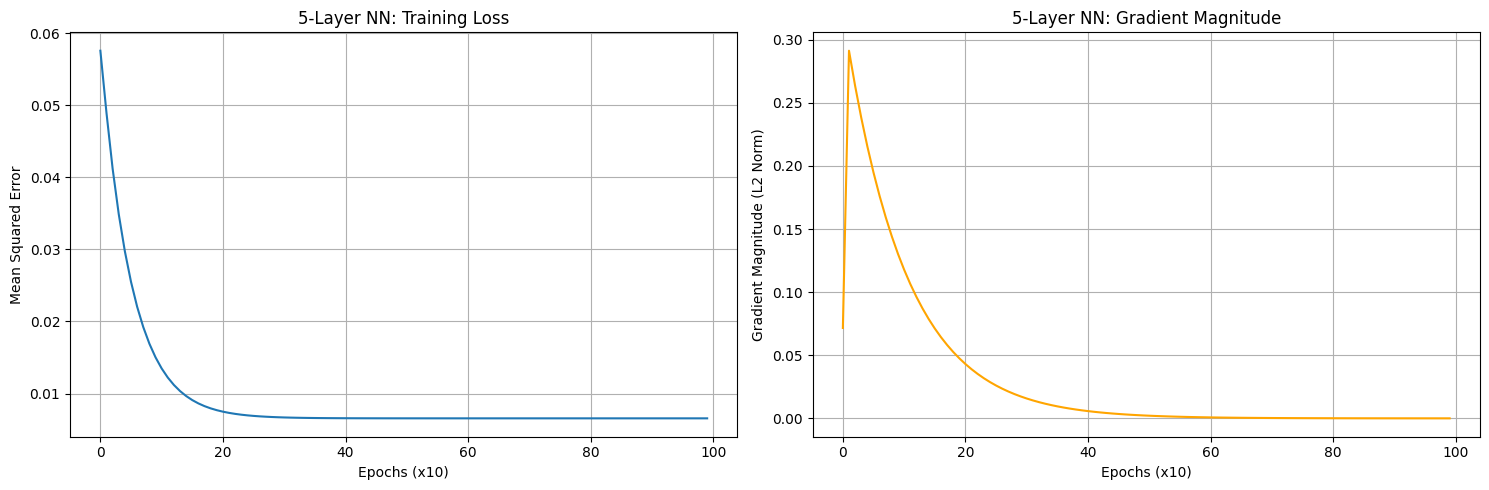

In [102]:
# Plot both loss and gradients for 5-layer model
model_5layer.plot_loss_and_gradients()

In [103]:
# Evaluate 5-layer model performance
print("=== 5-Layer NN: Training Set Performance ===")
train_mse_5, train_rmse_5, train_mae_5 = evaluate_model(model_5layer, X_train, y_train, y_min, y_max)
print(f"MSE: {train_mse_5:.4f}")
print(f"RMSE: {train_rmse_5:.4f}")
print(f"MAE: {train_mae_5:.4f}")

print("\n=== 5-Layer NN: Test Set Performance ===")
test_mse_5, test_rmse_5, test_mae_5 = evaluate_model(model_5layer, X_test, y_test, y_min, y_max)
print(f"MSE: {test_mse_5:.4f}")
print(f"RMSE: {test_rmse_5:.4f}")
print(f"MAE: {test_mae_5:.4f}")

=== 5-Layer NN: Training Set Performance ===
MSE: 10.2840
RMSE: 3.2069
MAE: 2.3569

=== 5-Layer NN: Test Set Performance ===
MSE: 10.8282
RMSE: 3.2906
MAE: 2.3848


# 15 Layer NN

In [112]:
class FifteenLayerNN:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01, epochs=1000):
        """
        Initialize a 15-layer neural network
        hidden_sizes: list of 14 integers for hidden layer sizes
        """
        self.lr = learning_rate
        self.epochs = epochs
        self.errors = []
        self.gradients = []
        self.layer_gradients = []  # Track gradients per layer
        
        # Initialize weights and biases for all 15 layers
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * 0.01
        self.b1 = np.zeros((1, hidden_sizes[0]))
        
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.01
        self.b2 = np.zeros((1, hidden_sizes[1]))
        
        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2]) * 0.01
        self.b3 = np.zeros((1, hidden_sizes[2]))
        
        self.W4 = np.random.randn(hidden_sizes[2], hidden_sizes[3]) * 0.01
        self.b4 = np.zeros((1, hidden_sizes[3]))
        
        self.W5 = np.random.randn(hidden_sizes[3], hidden_sizes[4]) * 0.01
        self.b5 = np.zeros((1, hidden_sizes[4]))
        
        self.W6 = np.random.randn(hidden_sizes[4], hidden_sizes[5]) * 0.01
        self.b6 = np.zeros((1, hidden_sizes[5]))
        
        self.W7 = np.random.randn(hidden_sizes[5], hidden_sizes[6]) * 0.01
        self.b7 = np.zeros((1, hidden_sizes[6]))
        
        self.W8 = np.random.randn(hidden_sizes[6], hidden_sizes[7]) * 0.01
        self.b8 = np.zeros((1, hidden_sizes[7]))
        
        self.W9 = np.random.randn(hidden_sizes[7], hidden_sizes[8]) * 0.01
        self.b9 = np.zeros((1, hidden_sizes[8]))
        
        self.W10 = np.random.randn(hidden_sizes[8], hidden_sizes[9]) * 0.01
        self.b10 = np.zeros((1, hidden_sizes[9]))
        
        self.W11 = np.random.randn(hidden_sizes[9], hidden_sizes[10]) * 0.01
        self.b11 = np.zeros((1, hidden_sizes[10]))
        
        self.W12 = np.random.randn(hidden_sizes[10], hidden_sizes[11]) * 0.01
        self.b12 = np.zeros((1, hidden_sizes[11]))
        
        self.W13 = np.random.randn(hidden_sizes[11], hidden_sizes[12]) * 0.01
        self.b13 = np.zeros((1, hidden_sizes[12]))
        
        self.W14 = np.random.randn(hidden_sizes[12], hidden_sizes[13]) * 0.01
        self.b14 = np.zeros((1, hidden_sizes[13]))
        
        self.W15 = np.random.randn(hidden_sizes[13], output_size) * 0.01
        self.b15 = np.zeros((1, output_size))
    
    def forward(self, X):
        """Forward propagation through all 15 layers"""
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = Relu(self.z1)
        
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = Relu(self.z2)
        
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = Relu(self.z3)
        
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.a4 = Relu(self.z4)
        
        self.z5 = np.dot(self.a4, self.W5) + self.b5
        self.a5 = Relu(self.z5)
        
        self.z6 = np.dot(self.a5, self.W6) + self.b6
        self.a6 = Relu(self.z6)
        
        self.z7 = np.dot(self.a6, self.W7) + self.b7
        self.a7 = Relu(self.z7)
        
        self.z8 = np.dot(self.a7, self.W8) + self.b8
        self.a8 = Relu(self.z8)
        
        self.z9 = np.dot(self.a8, self.W9) + self.b9
        self.a9 = Relu(self.z9)
        
        self.z10 = np.dot(self.a9, self.W10) + self.b10
        self.a10 = Relu(self.z10)
        
        self.z11 = np.dot(self.a10, self.W11) + self.b11
        self.a11 = Relu(self.z11)
        
        self.z12 = np.dot(self.a11, self.W12) + self.b12
        self.a12 = Relu(self.z12)
        
        self.z13 = np.dot(self.a12, self.W13) + self.b13
        self.a13 = Relu(self.z13)
        
        self.z14 = np.dot(self.a13, self.W14) + self.b14
        self.a14 = Relu(self.z14)
        
        self.z15 = np.dot(self.a14, self.W15) + self.b15
        self.a15 = Relu(self.z15)
        
        return self.a15
    
    def compute_loss(self, y_true, y_pred):
        """Mean Squared Error loss"""
        m = y_true.shape[0]
        loss = np.sum((y_pred - y_true) ** 2) / (2 * m)
        return loss
    
    def backward(self, X, y_true, y_pred):
        """Backpropagation through all 15 layers"""
        m = X.shape[0]
        
        # Layer 15 (output)
        dz15 = (y_pred - y_true) * Relu_derivative(self.a15)
        dW15 = np.dot(self.a14.T, dz15) / m
        db15 = np.sum(dz15, axis=0, keepdims=True) / m
        
        # Layer 14
        dz14 = np.dot(dz15, self.W15.T) * Relu_derivative(self.a14)
        dW14 = np.dot(self.a13.T, dz14) / m
        db14 = np.sum(dz14, axis=0, keepdims=True) / m
        
        # Layer 13
        dz13 = np.dot(dz14, self.W14.T) * Relu_derivative(self.a13)
        dW13 = np.dot(self.a12.T, dz13) / m
        db13 = np.sum(dz13, axis=0, keepdims=True) / m
        
        # Layer 12
        dz12 = np.dot(dz13, self.W13.T) * Relu_derivative(self.a12)
        dW12 = np.dot(self.a11.T, dz12) / m
        db12 = np.sum(dz12, axis=0, keepdims=True) / m
        
        # Layer 11
        dz11 = np.dot(dz12, self.W12.T) * Relu_derivative(self.a11)
        dW11 = np.dot(self.a10.T, dz11) / m
        db11 = np.sum(dz11, axis=0, keepdims=True) / m
        
        # Layer 10
        dz10 = np.dot(dz11, self.W11.T) * Relu_derivative(self.a10)
        dW10 = np.dot(self.a9.T, dz10) / m
        db10 = np.sum(dz10, axis=0, keepdims=True) / m
        
        # Layer 9
        dz9 = np.dot(dz10, self.W10.T) * Relu_derivative(self.a9)
        dW9 = np.dot(self.a8.T, dz9) / m
        db9 = np.sum(dz9, axis=0, keepdims=True) / m
        
        # Layer 8
        dz8 = np.dot(dz9, self.W9.T) * Relu_derivative(self.a8)
        dW8 = np.dot(self.a7.T, dz8) / m
        db8 = np.sum(dz8, axis=0, keepdims=True) / m
        
        # Layer 7
        dz7 = np.dot(dz8, self.W8.T) * Relu_derivative(self.a7)
        dW7 = np.dot(self.a6.T, dz7) / m
        db7 = np.sum(dz7, axis=0, keepdims=True) / m
        
        # Layer 6
        dz6 = np.dot(dz7, self.W7.T) * Relu_derivative(self.a6)
        dW6 = np.dot(self.a5.T, dz6) / m
        db6 = np.sum(dz6, axis=0, keepdims=True) / m
        
        # Layer 5
        dz5 = np.dot(dz6, self.W6.T) * Relu_derivative(self.a5)
        dW5 = np.dot(self.a4.T, dz5) / m
        db5 = np.sum(dz5, axis=0, keepdims=True) / m
        
        # Layer 4
        dz4 = np.dot(dz5, self.W5.T) * Relu_derivative(self.a4)
        dW4 = np.dot(self.a3.T, dz4) / m
        db4 = np.sum(dz4, axis=0, keepdims=True) / m
        
        # Layer 3
        dz3 = np.dot(dz4, self.W4.T) * Relu_derivative(self.a3)
        dW3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m
        
        # Layer 2
        dz2 = np.dot(dz3, self.W3.T) * Relu_derivative(self.a2)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Layer 1
        dz1 = np.dot(dz2, self.W2.T) * Relu_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Calculate total gradient magnitude
        gradient_magnitude = np.sqrt(
            np.sum(dW1**2) + np.sum(db1**2) +
            np.sum(dW2**2) + np.sum(db2**2) +
            np.sum(dW3**2) + np.sum(db3**2) +
            np.sum(dW4**2) + np.sum(db4**2) +
            np.sum(dW5**2) + np.sum(db5**2) +
            np.sum(dW6**2) + np.sum(db6**2) +
            np.sum(dW7**2) + np.sum(db7**2) +
            np.sum(dW8**2) + np.sum(db8**2) +
            np.sum(dW9**2) + np.sum(db9**2) +
            np.sum(dW10**2) + np.sum(db10**2) +
            np.sum(dW11**2) + np.sum(db11**2) +
            np.sum(dW12**2) + np.sum(db12**2) +
            np.sum(dW13**2) + np.sum(db13**2) +
            np.sum(dW14**2) + np.sum(db14**2) +
            np.sum(dW15**2) + np.sum(db15**2)
        )
        
        # Update weights and biases
        self.W15 -= self.lr * dW15
        self.b15 -= self.lr * db15
        self.W14 -= self.lr * dW14
        self.b14 -= self.lr * db14
        self.W13 -= self.lr * dW13
        self.b13 -= self.lr * db13
        self.W12 -= self.lr * dW12
        self.b12 -= self.lr * db12
        self.W11 -= self.lr * dW11
        self.b11 -= self.lr * db11
        self.W10 -= self.lr * dW10
        self.b10 -= self.lr * db10
        self.W9 -= self.lr * dW9
        self.b9 -= self.lr * db9
        self.W8 -= self.lr * dW8
        self.b8 -= self.lr * db8
        self.W7 -= self.lr * dW7
        self.b7 -= self.lr * db7
        self.W6 -= self.lr * dW6
        self.b6 -= self.lr * db6
        self.W5 -= self.lr * dW5
        self.b5 -= self.lr * db5
        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        
        return gradient_magnitude
    
    def train(self, X_train, y_train, X_val=None, y_val=None, verbose=True):
        """Train the neural network"""
        for epoch in range(self.epochs):
            # Forward propagation
            y_pred = self.forward(X_train)
            
            # Backward propagation
            grad_magnitude = self.backward(X_train, y_train, y_pred)
            
            # Compute and store error and gradients
            if epoch % 10 == 0:
                train_loss = self.compute_loss(y_train, y_pred)
                self.errors.append(train_loss)
                self.gradients.append(grad_magnitude)
                
                if verbose and epoch % 100 == 0:
                    if X_val is not None and y_val is not None:
                        val_pred = self.forward(X_val)
                        val_loss = self.compute_loss(y_val, val_pred)
                        print(f"Epoch {epoch}/{self.epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Grad: {grad_magnitude:.6f}")
                    else:
                        print(f"Epoch {epoch}/{self.epochs} - Train Loss: {train_loss:.4f}, Grad: {grad_magnitude:.6f}")
    
    def predict(self, X):
        """Make predictions"""
        return self.forward(X)
    
    def plot_loss(self):
        """Plot training loss"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.errors)
        plt.xlabel('Epochs (x10)')
        plt.ylabel('Mean Squared Error')
        plt.title('15-Layer NN: Training Loss over Epochs')
        plt.grid(True)
        plt.show()
    
    def plot_gradients(self):
        """Plot gradient magnitude over epochs"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.gradients)
        plt.xlabel('Epochs (x10)')
        plt.ylabel('Gradient Magnitude (L2 Norm)')
        plt.title('15-Layer NN: Gradient Magnitude over Epochs')
        plt.grid(True)
        plt.show()
    
    def plot_loss_and_gradients(self):
        """Plot both loss and gradient magnitude"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss
        ax1.plot(self.errors)
        ax1.set_xlabel('Epochs (x10)')
        ax1.set_ylabel('Mean Squared Error')
        ax1.set_title('15-Layer NN: Training Loss')
        ax1.grid(True)
        
        # Plot gradients
        ax2.plot(self.gradients, color='red')
        ax2.set_xlabel('Epochs (x10)')
        ax2.set_ylabel('Gradient Magnitude (L2 Norm)')
        ax2.set_title('15-Layer NN: Gradient Magnitude')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()


In [113]:
# Initialize 15-layer neural network
# Architecture: input -> 128 -> 128 -> 64 -> 64 -> 32 -> 32 -> 16 -> 16 -> 8 -> 8 -> 4 -> 4 -> 2 -> 2 -> output
hidden_layers_15 = [128, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 4, 2, 2]

print(f"Initializing 15-Layer Neural Network...")
print(f"Architecture: {input_size} -> {' -> '.join(map(str, hidden_layers_15))} -> {output_size}")
print(f"Learning rate: {ETA}, Epochs: {EPOCHS}")

model_15layer = FifteenLayerNN(input_size, hidden_layers_15, output_size, learning_rate=ETA, epochs=EPOCHS)

Initializing 15-Layer Neural Network...
Architecture: 10 -> 128 -> 128 -> 64 -> 64 -> 32 -> 32 -> 16 -> 16 -> 8 -> 8 -> 4 -> 4 -> 2 -> 2 -> 1
Learning rate: 0.01, Epochs: 1000


In [114]:
# Evaluate 15-layer model performance
print("=== 15-Layer NN: Training Set Performance ===")
train_mse_15, train_rmse_15, train_mae_15 = evaluate_model(model_15layer, X_train, y_train, y_min, y_max)
print(f"MSE: {train_mse_15:.4f}")
print(f"RMSE: {train_rmse_15:.4f}")
print(f"MAE: {train_mae_15:.4f}")

print("\n=== 15-Layer NN: Test Set Performance ===")
test_mse_15, test_rmse_15, test_mae_15 = evaluate_model(model_15layer, X_test, y_test, y_min, y_max)
print(f"MSE: {test_mse_15:.4f}")
print(f"RMSE: {test_rmse_15:.4f}")
print(f"MAE: {test_mae_15:.4f}")

=== 15-Layer NN: Training Set Performance ===
MSE: 90.2903
RMSE: 9.5021
MAE: 8.9446

=== 15-Layer NN: Test Set Performance ===
MSE: 89.8565
RMSE: 9.4793
MAE: 8.8900


In [115]:
# Train the 15-layer model
print("Training 15-layer model...")
model_15layer.train(X_train, y_train, X_test, y_test, verbose=True)

Training 15-layer model...
Epoch 0/1000 - Train Loss: 0.0576, Val Loss: 0.0563, Grad: 0.319470
Epoch 100/1000 - Train Loss: 0.0134, Val Loss: 0.0134, Grad: 0.116928
Epoch 200/1000 - Train Loss: 0.0075, Val Loss: 0.0077, Grad: 0.042798
Epoch 300/1000 - Train Loss: 0.0067, Val Loss: 0.0070, Grad: 0.015665
Epoch 400/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.005734
Epoch 500/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.002099
Epoch 600/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.000768
Epoch 700/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.000281
Epoch 800/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.000103
Epoch 900/1000 - Train Loss: 0.0066, Val Loss: 0.0069, Grad: 0.000038


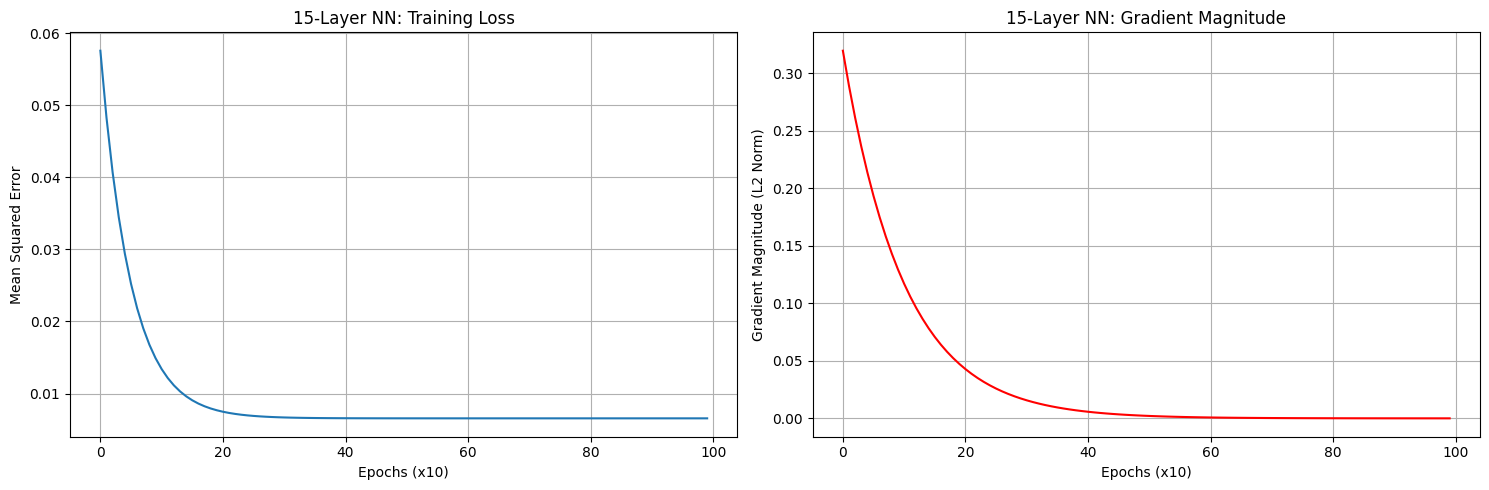

In [116]:
# Plot both loss and gradients for 15-layer model
model_15layer.plot_loss_and_gradients()

# Final Comparision

=== Model Comparison ===

Single Layer NN:
  Test RMSE: 2.2746
  Test MAE: 1.6275
  Final Gradient: 0.004699

5-Layer NN:
  Test RMSE: 3.2906
  Test MAE: 2.3848
  Final Gradient: 0.000019

15-Layer NN:
  Test RMSE: 9.4793
  Test MAE: 8.8900
  Final Gradient: 0.000015


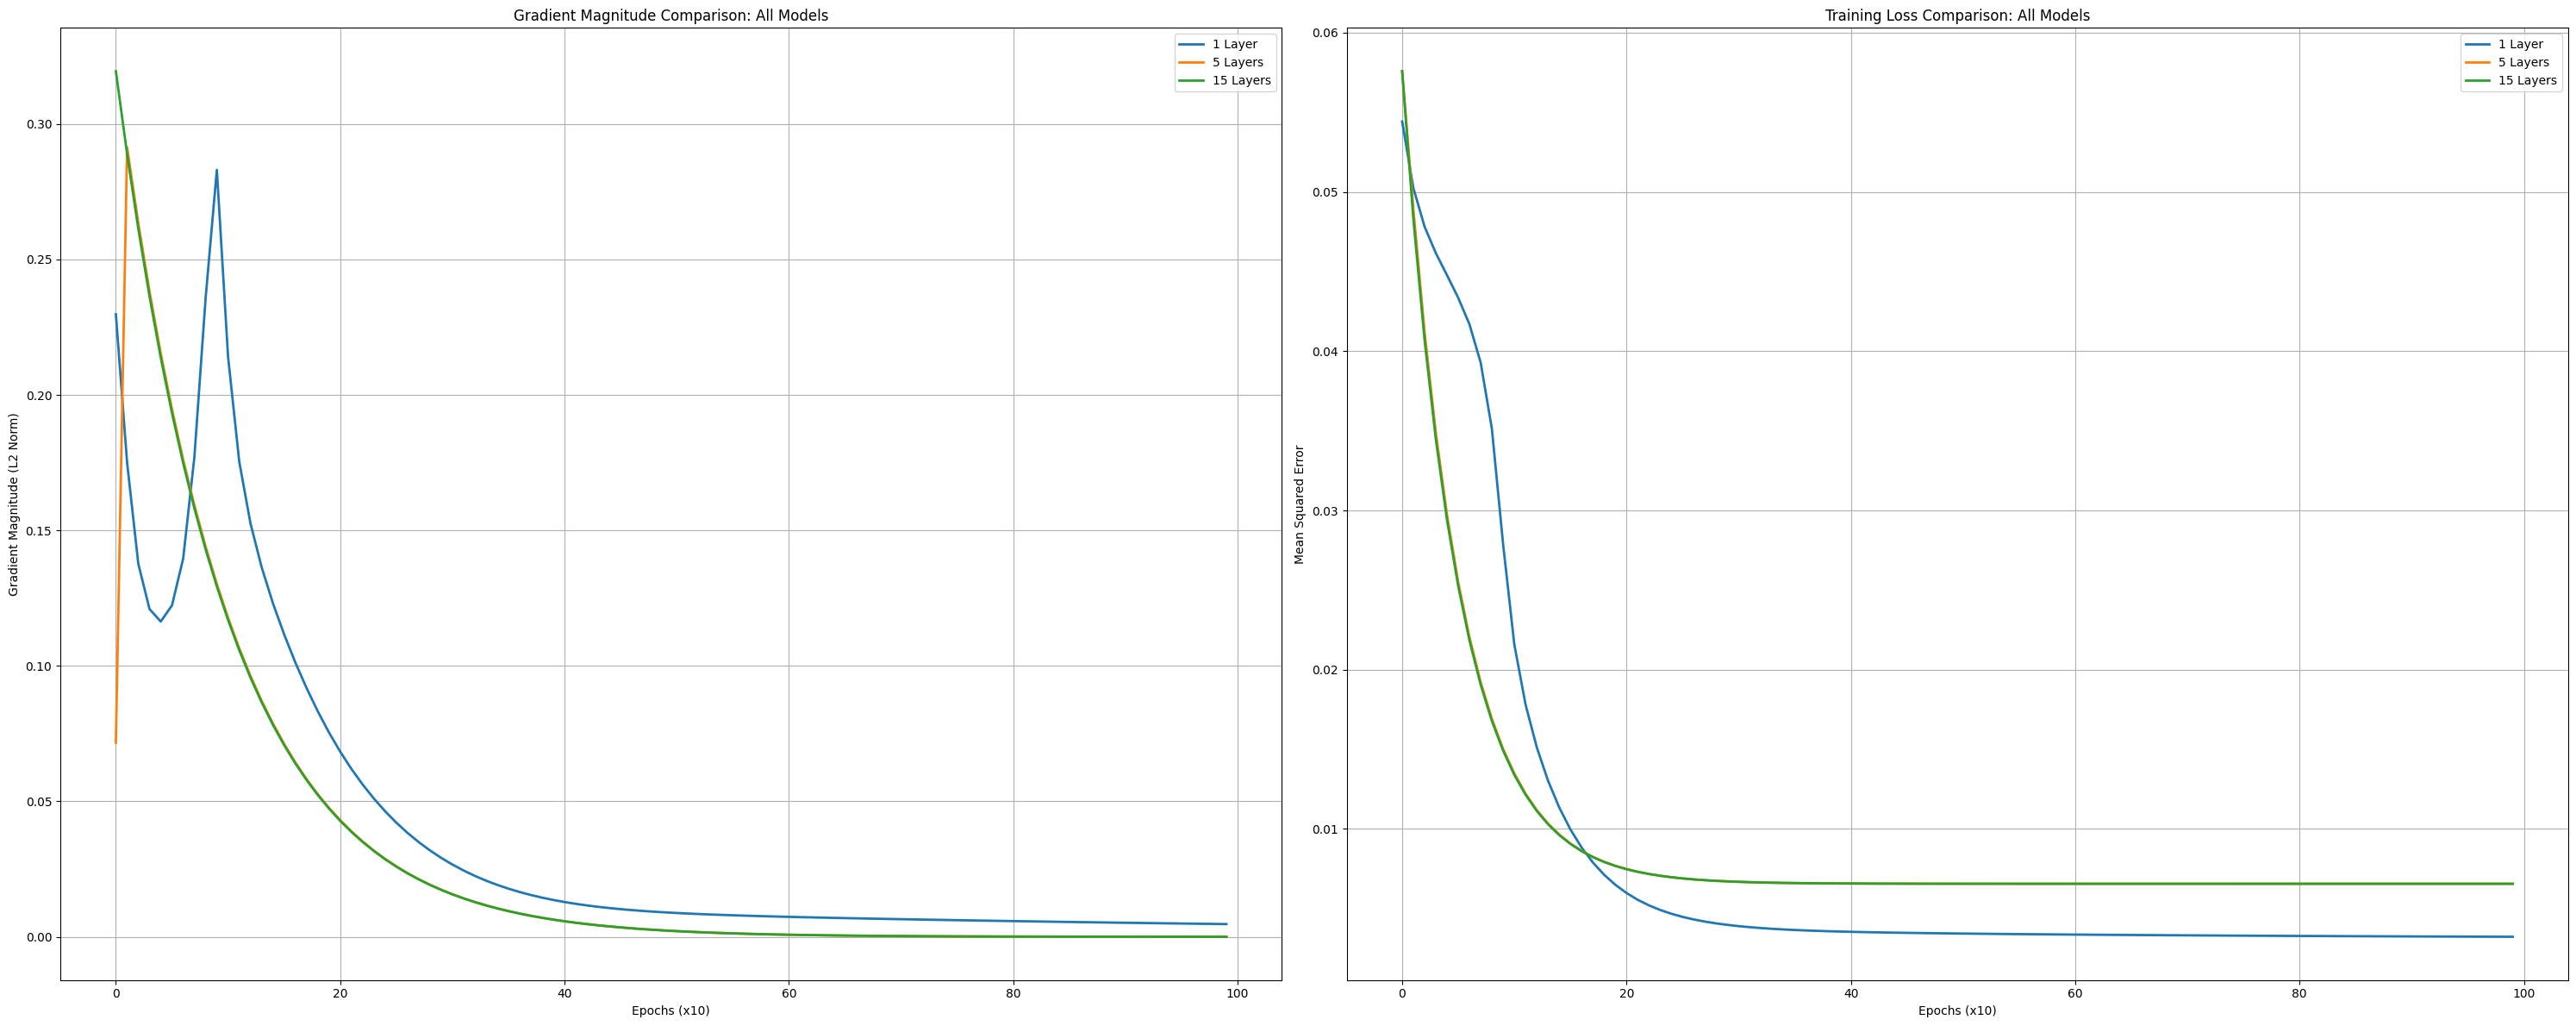

SUMMARY: Gradient Vanishing Analysis
Model           Test RMSE    Test MAE     Final Gradient 
1-Layer         2.2746       1.6275       0.004699       
5-Layer         3.2906       2.3848       0.000019       
15-Layer        9.4793       8.8900       0.000015       


In [119]:
# Compare single-layer vs 5-layer vs 15-layer model
print("=== Model Comparison ===")
print("\nSingle Layer NN:")
print(f"  Test RMSE: {test_rmse:.4f}")
print(f"  Test MAE: {test_mae:.4f}")
print(f"  Final Gradient: {model.gradients[-1]:.6f}")

print("\n5-Layer NN:")
print(f"  Test RMSE: {test_rmse_5:.4f}")
print(f"  Test MAE: {test_mae_5:.4f}")
print(f"  Final Gradient: {model_5layer.gradients[-1]:.6f}")

print("\n15-Layer NN:")
print(f"  Test RMSE: {test_rmse_15:.4f}")
print(f"  Test MAE: {test_mae_15:.4f}")
print(f"  Final Gradient: {model_15layer.gradients[-1]:.6f}")

# Plot gradient comparison for all three models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))

# Plot 1: All models on same scale
ax1.plot(model.gradients, label='1 Layer', linewidth=2)
ax1.plot(model_5layer.gradients, label='5 Layers', linewidth=2)
ax1.plot(model_15layer.gradients, label='15 Layers', linewidth=2)
ax1.set_xlabel('Epochs (x10)')
ax1.set_ylabel('Gradient Magnitude (L2 Norm)')
ax1.set_title('Gradient Magnitude Comparison: All Models')
ax1.legend()
ax1.grid(True)

# Plot 2: Loss comparison
ax2.plot(model.errors, label='1 Layer', linewidth=2)
ax2.plot(model_5layer.errors, label='5 Layers', linewidth=2)
ax2.plot(model_15layer.errors, label='15 Layers', linewidth=2)
ax2.set_xlabel('Epochs (x10)')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Training Loss Comparison: All Models')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Summary table
print("SUMMARY: Gradient Vanishing Analysis")
print(f"{'Model':<15} {'Test RMSE':<12} {'Test MAE':<12} {'Final Gradient':<15}")
print(f"{'1-Layer':<15} {test_rmse:<12.4f} {test_mae:<12.4f} {model.gradients[-1]:<15.6f}")
print(f"{'5-Layer':<15} {test_rmse_5:<12.4f} {test_mae_5:<12.4f} {model_5layer.gradients[-1]:<15.6f}")
print(f"{'15-Layer':<15} {test_rmse_15:<12.4f} {test_mae_15:<12.4f} {model_15layer.gradients[-1]:<15.6f}")